# NEWS CLASSIFICATION SYSTEM

In this era every other sphere of life is having a data explosion where the top most priority is to analyze data with efficiency.
This news classification system is an attempt to use NLP prowess and extend text classification to see how we can implement automated news genre labeling.

# Talk to JARVIS for project summary!!

In [111]:
from nltk.chat.util import Chat,reflections

jarvis=[
    ['Need help summarizing',['Greetings! Jarvis is your assistant today']],
    ['Explain the project Jarvis',['This is a News Identification System which got trained on 2225 instances!!']],
    ['What were my categories?',['sports, tech, business, entertainment and politics']],
    ['So tell me about the models',['Logistic Regression, Decision Tree and SGD Classifier']],
    ['That will be all.Thank you',['Nice talk! Do look at the project in detail  Jarvis signing off..']]
]

In [112]:
chat=Chat(jarvis,reflections)

In [ ]:
chat.converse()

>Need help summarizing
Greetings! Jarvis is your assistant today
>Explain the project Jarvis
This is a News Identification System which got trained on 2225 instances!!
>What were my categories?
sports, tech, business, entertainment and politics
>So tell me about the models
Logistic Regression, Decision Tree and SGD Classifier
>That will be all.Thank you
Nice talk! Do look at the project in detail  Jarvis signing off..


In [66]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
import string

In [67]:
df_news=pd.read_csv(r'/Users/radhikagarg/Desktop/NLP+PRO/BBCNEWS.csv',sep=';')
df_news.columns=["File_Name","Content","Category","Complete"]
print(df_news.info())
df_news.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   File_Name  2225 non-null   object
 1   Content    2225 non-null   object
 2   Category   2225 non-null   object
 3   Complete   2225 non-null   object
dtypes: object(4)
memory usage: 69.7+ KB
None


,File_Name,Content,Category,Complete
0,001.txt,Ad sales boost Time Warner profit\n\nQuarterly...,business,001.txt-business
1,002.txt,Dollar gains on Greenspan speech\n\nThe dollar...,business,002.txt-business
2,003.txt,Yukos unit buyer faces loan claim\n\nThe owner...,business,003.txt-business
3,004.txt,High fuel prices hit BA's profits\n\nBritish A...,business,004.txt-business
4,005.txt,Pernod takeover talk lifts Domecq\n\nShares in...,business,005.txt-business


In [68]:
#dropping off some unrequired stuff
df_news=df_news.drop(['File_Name','Complete'], axis = 1)
df_news.head()

,Content,Category
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [69]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Content   2225 non-null   object
 1   Category  2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


# Need to check if my dataset is balanced!!

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: Category, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


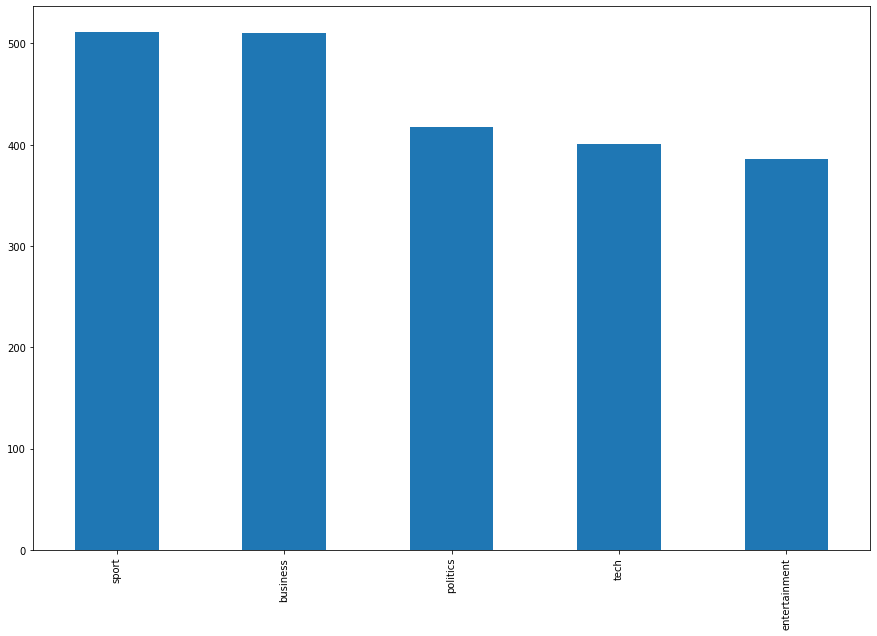

In [70]:
#check if my dataset is balanced
print(df_news['Category'].value_counts())
print(df_news['Category'].value_counts().plot( kind='bar', figsize=(15,10)))

# it is indeed!

In [71]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/radhikagarg/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/radhikagarg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/radhikagarg/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/radhikagarg/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# CLEANING AND LEMMATIZING

In [72]:
#CLEANING FOR NLP
import re
import string

# start cleaning numbers substitute by " "
df_news['Content']=[re.sub('\d',"",i) for i in df_news['Content']] # regex for numbers

# start cleaning special characters substitute by white space
df_news['Content']=[re.sub('[%s]' % re.escape(string.punctuation),' ',i) for i in df_news['Content']]

# start making lowercase
df_news['Content']=[i.lower() for i in df_news['Content']]
df_news.head(10)

,Content,Category
0,ad sales boost time warner profit\n\nquarterly...,business
1,dollar gains on greenspan speech\n\nthe dollar...,business
2,yukos unit buyer faces loan claim\n\nthe owner...,business
3,high fuel prices hit ba s profits\n\nbritish a...,business
4,pernod takeover talk lifts domecq\n\nshares in...,business
5,japan narrowly escapes recession\n\njapan s ec...,business
6,jobs growth still slow in the us\n\nthe us cre...,business
7,india calls for fair trade rules\n\nindia whi...,business
8,ethiopia s crop production up \n\nethiopia pr...,business
9,court rejects bn tobacco case\n\na us governm...,business


In [73]:
#create new column of word tokens 
df_news['words_text']=[nltk.word_tokenize(i) for i in df_news['Content']]
df_news.head()

,Content,Category,words_text
0,ad sales boost time warner profit\n\nquarterly...,business,"[ad, sales, boost, time, warner, profit, quart..."
1,dollar gains on greenspan speech\n\nthe dollar...,business,"[dollar, gains, on, greenspan, speech, the, do..."
2,yukos unit buyer faces loan claim\n\nthe owner...,business,"[yukos, unit, buyer, faces, loan, claim, the, ..."
3,high fuel prices hit ba s profits\n\nbritish a...,business,"[high, fuel, prices, hit, ba, s, profits, brit..."
4,pernod takeover talk lifts domecq\n\nshares in...,business,"[pernod, takeover, talk, lifts, domecq, shares..."


In [74]:
# remove stopwords from tokens
stop_words=set(stopwords.words('english'))
df_news['stopwordsremoved_txt']=[[i for i in j if not i in stop_words] for j in df_news['words_text']]
df_news.head()

,Content,Category,words_text,stopwordsremoved_txt
0,ad sales boost time warner profit\n\nquarterly...,business,"[ad, sales, boost, time, warner, profit, quart...","[ad, sales, boost, time, warner, profit, quart..."
1,dollar gains on greenspan speech\n\nthe dollar...,business,"[dollar, gains, on, greenspan, speech, the, do...","[dollar, gains, greenspan, speech, dollar, hit..."
2,yukos unit buyer faces loan claim\n\nthe owner...,business,"[yukos, unit, buyer, faces, loan, claim, the, ...","[yukos, unit, buyer, faces, loan, claim, owner..."
3,high fuel prices hit ba s profits\n\nbritish a...,business,"[high, fuel, prices, hit, ba, s, profits, brit...","[high, fuel, prices, hit, ba, profits, british..."
4,pernod takeover talk lifts domecq\n\nshares in...,business,"[pernod, takeover, talk, lifts, domecq, shares...","[pernod, takeover, talk, lifts, domecq, shares..."


In [75]:
# lemmatisation
def lemmatize_text(text):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    return [lemmatizer.lemmatize(w) for w in text]

df_news['lemma'] = df_news.stopwordsremoved_txt.apply(lemmatize_text)
df_news.head()

,Content,Category,words_text,stopwordsremoved_txt,lemma
0,ad sales boost time warner profit\n\nquarterly...,business,"[ad, sales, boost, time, warner, profit, quart...","[ad, sales, boost, time, warner, profit, quart...","[ad, sale, boost, time, warner, profit, quarte..."
1,dollar gains on greenspan speech\n\nthe dollar...,business,"[dollar, gains, on, greenspan, speech, the, do...","[dollar, gains, greenspan, speech, dollar, hit...","[dollar, gain, greenspan, speech, dollar, hit,..."
2,yukos unit buyer faces loan claim\n\nthe owner...,business,"[yukos, unit, buyer, faces, loan, claim, the, ...","[yukos, unit, buyer, faces, loan, claim, owner...","[yukos, unit, buyer, face, loan, claim, owner,..."
3,high fuel prices hit ba s profits\n\nbritish a...,business,"[high, fuel, prices, hit, ba, s, profits, brit...","[high, fuel, prices, hit, ba, profits, british...","[high, fuel, price, hit, ba, profit, british, ..."
4,pernod takeover talk lifts domecq\n\nshares in...,business,"[pernod, takeover, talk, lifts, domecq, shares...","[pernod, takeover, talk, lifts, domecq, shares...","[pernod, takeover, talk, lift, domecq, share, ..."


In [76]:
#join the lemmas
df_news['lemma_joined']=df_news['lemma'].apply(lambda x:  ' '.join(x))
df_news.head()

,Content,Category,words_text,stopwordsremoved_txt,lemma,lemma_joined
0,ad sales boost time warner profit\n\nquarterly...,business,"[ad, sales, boost, time, warner, profit, quart...","[ad, sales, boost, time, warner, profit, quart...","[ad, sale, boost, time, warner, profit, quarte...",ad sale boost time warner profit quarterly pro...
1,dollar gains on greenspan speech\n\nthe dollar...,business,"[dollar, gains, on, greenspan, speech, the, do...","[dollar, gains, greenspan, speech, dollar, hit...","[dollar, gain, greenspan, speech, dollar, hit,...",dollar gain greenspan speech dollar hit highes...
2,yukos unit buyer faces loan claim\n\nthe owner...,business,"[yukos, unit, buyer, faces, loan, claim, the, ...","[yukos, unit, buyer, faces, loan, claim, owner...","[yukos, unit, buyer, face, loan, claim, owner,...",yukos unit buyer face loan claim owner embattl...
3,high fuel prices hit ba s profits\n\nbritish a...,business,"[high, fuel, prices, hit, ba, s, profits, brit...","[high, fuel, prices, hit, ba, profits, british...","[high, fuel, price, hit, ba, profit, british, ...",high fuel price hit ba profit british airway b...
4,pernod takeover talk lifts domecq\n\nshares in...,business,"[pernod, takeover, talk, lifts, domecq, shares...","[pernod, takeover, talk, lifts, domecq, shares...","[pernod, takeover, talk, lift, domecq, share, ...",pernod takeover talk lift domecq share uk drin...


# Succesfuly build lemmas!!

# lets have a look at them with the wordcloud

AttributeError: module 'matplotlib.pyplot' has no attribute 'figsize'

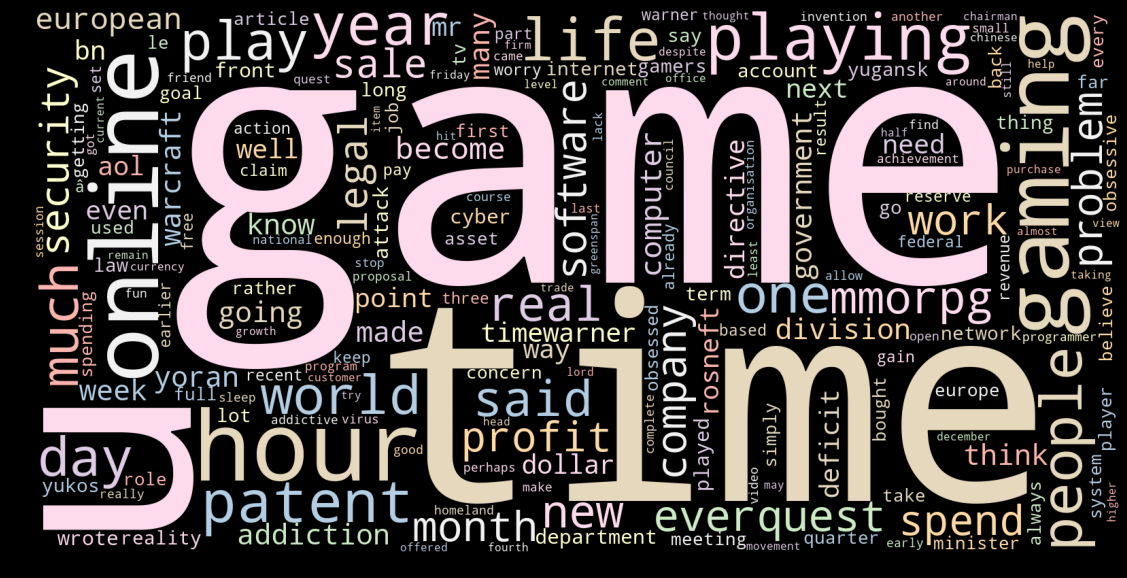

In [77]:
#!pip install wordcloud
from wordcloud import WordCloud
from matplotlib import pyplot as plt
text = df_news['lemma_joined'].values 

wordcloud = WordCloud(width=1600, height=800,background_color='black', colormap='Pastel1',collocations=False).generate(str(text))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.figsize(15,10)
plt.axis("off")
plt.show()

# wordcloud 

# BOW

In [78]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(df_news['lemma_joined'],df_news['Category'],test_size=0.3)
tfidf = TfidfVectorizer(max_features=5000) 

#BOW
bow=tfidf.fit_transform(df_news['lemma_joined']).toarray()
df_news['Category2']=enc.fit_transform(df_news['Category'])
train_x,test_x,train_y,test_y=train_test_split(bow,df_news['Category2'],test_size=0.2)
pd.DataFrame(test_x,columns=tfidf.get_feature_names()).head(20)

,aaa,abandoned,abc,ability,able,abn,abortion,abroad,absence,absolute,...,yuan,yugansk,yuganskneftegas,yukos,yushchenko,zealand,zero,zombie,zone,zurich
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.06204,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.045790,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.000000,0.027899,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.038421,0.000000,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# LOGISTIC REGRESSION

In [79]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(train_x,train_y)
my_pred=logreg.predict(test_x)

from sklearn import  metrics

print(metrics.classification_report(my_pred, test_y))

# Use accuracy_score function to get the accuracy
print("Logistic Regression Accuracy Score -> ",round(metrics.accuracy_score(my_pred, test_y)*100,2),"%")

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        94
           1       0.96      0.96      0.96        76
           2       1.00      0.99      0.99        77
           3       1.00      0.98      0.99       111
           4       0.96      0.99      0.97        87

    accuracy                           0.98       445
   macro avg       0.98      0.98      0.98       445
weighted avg       0.98      0.98      0.98       445

Logistic Regression Accuracy Score ->  98.2 %


Text(0.5, 1.0, 'Confusion matrix of the classifier')

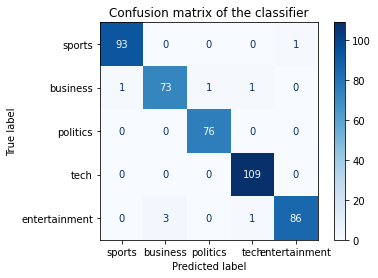

In [80]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

labels = ['sports','business','politics','tech','entertainment']
plot_confusion_matrix(logreg,test_x,test_y,display_labels=labels,cmap=plt.cm.Blues)
plt.title('Confusion matrix of the classifier')

# Logistics did great as seen by the diagonal of the matrix.

# DECISSION TREE CLASSIFICATION

In [81]:
# dtree classifier
from sklearn.tree import DecisionTreeClassifier 

model=DecisionTreeClassifier()
model.fit(train_x,train_y)

base_pred=model.predict(test_x)

print(classification_report(test_y,base_pred))
print("Decision Tree Accuracy Score -> ",round(metrics.accuracy_score(base_pred, test_y)*100,2),"%")

              precision    recall  f1-score   support

           0       0.82      0.77      0.79        94
           1       0.73      0.79      0.76        76
           2       0.79      0.86      0.82        76
           3       0.91      0.94      0.93       109
           4       0.91      0.81      0.86        90

    accuracy                           0.84       445
   macro avg       0.83      0.83      0.83       445
weighted avg       0.84      0.84      0.84       445

Decision Tree Accuracy Score ->  83.82 %


Text(0.5, 1.0, 'Confusion matrix of the classifier')

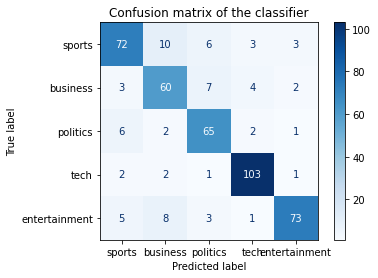

In [82]:
labels = ['sports','business','politics','tech','entertainment']
plot_confusion_matrix(model,test_x,test_y,display_labels=labels,cmap=plt.cm.Blues)
plt.title('Confusion matrix of the classifier')

# This also is doing good but not as logistic.

# SGD CLASSIFIER

In [83]:
#https://scikit-learn.org/stable/modules/sgd.html
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(train_x, train_y)
SGDClassifier(max_iter=5)

base_pred=clf.predict(test_x)

print(classification_report(test_y,base_pred))
print("SGD Classifier Accuracy Score -> ",round(metrics.accuracy_score(base_pred, test_y)*100,2),"%")

              precision    recall  f1-score   support

           0       0.99      0.94      0.96        94
           1       0.97      0.92      0.95        76
           2       0.93      1.00      0.96        76
           3       0.99      1.00      1.00       109
           4       0.96      0.98      0.97        90

    accuracy                           0.97       445
   macro avg       0.97      0.97      0.97       445
weighted avg       0.97      0.97      0.97       445

SGD Classifier Accuracy Score ->  96.85 %


/Users/radhikagarg/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Text(0.5, 1.0, 'Confusion matrix of the classifier')

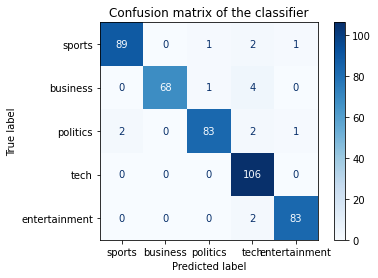

In [41]:
labels = ['sports','business','politics','tech','entertainment']
plot_confusion_matrix(clf,test_x,test_y,display_labels=labels,cmap=plt.cm.Blues)
plt.title('Confusion matrix of the classifier')

# SGD is also very close to Logistic results!

# CONCLUSION

# All models acheived high accuracy but logistic outperformed all.